# UV map
- nii to vtk
    - nii2mesh lt_hippocampus.nii.gz -r 1 -prefix lt_hippocampus.obj
- vtk to obj
    - https://imagetostl.com/convert/file/vtk/to/obj
- UV map is computed from UV-mapper
    - https://www.uvmapper.com/downloads.html


# Common Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go
import nibabel as nb
from glob import glob
from copy import copy

# Custom Libraries

In [2]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module")
sys.path.append("/home/seojin/Seojin_commonTool/Module/Brain_Surface/")

from plot_3d import draw_uv_map, show_non_interactive_mesh, show_mesh
from brain_mesh import show_stat_onUV, load_mesh, show_interactive_mesh, show_components, component_mesh_info
from sj_matplotlib import get_color, make_line_legend
from surface_analysis import surface_profile_onUV, draw_cross_section_1dPlot
from brain_mesh import inverse_component_mesh_info

# Constants

In [3]:
mask_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/roi/mask/hippocampus"

lt_hippo_path = os.path.join(mask_dir_path, "lt_hippocampus.obj")
lt_hippo_uv_path = os.path.join(mask_dir_path, "lt_hippocampus_uvPlanarZ.obj")

rt_hippo_path = os.path.join(mask_dir_path, "rt_hippocampus.obj")
rt_hippo_uv_path = os.path.join(mask_dir_path, "rt_hippocampus_uvPlanarZ.obj")

from_point = np.array([0.25, 1])
to_point = np.array([0.25, 0.1]) 

n_sampling = 10
width = 0.1

save_dir_path = "/mnt/ext1/seojin/temp"

# Load Data

In [4]:
# Vertex & Faces
lt_hippo_mesh_info = load_mesh(lt_hippo_path)
lt_hippo_uv_mesh_info = load_mesh(lt_hippo_uv_path, type_ = "uv")

rt_hippo_mesh_info = load_mesh(rt_hippo_path)
rt_hippo_uv_mesh_info = load_mesh(rt_hippo_uv_path, type_ = "uv")

# Data
data_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/Group/rsa/rdm/set/WholeSet/base_seqOnly/None/pattern_separation"
data_paths = sorted(glob(os.path.join(data_dir_path, "WholeSet_HP*")))

# Orientation

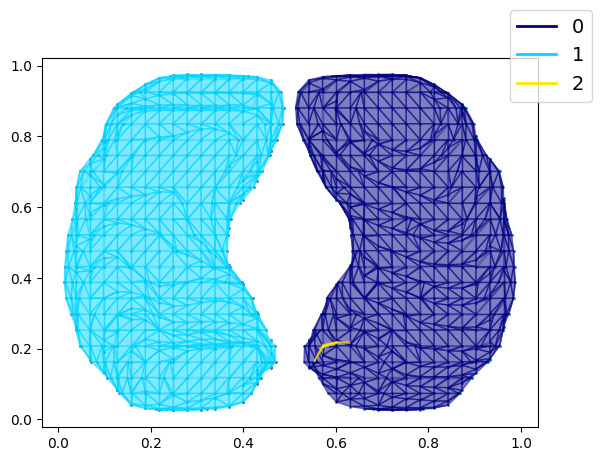

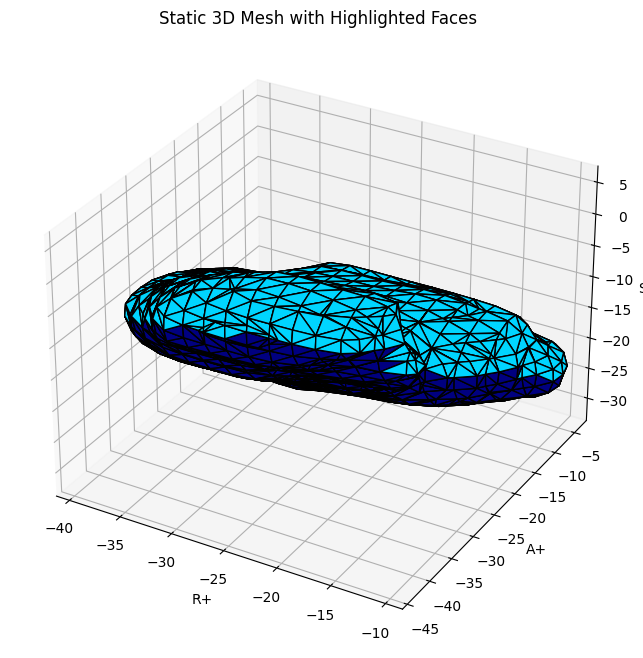

In [5]:
lt_face_components, (_, _) = show_components(lt_hippo_mesh_info, lt_hippo_uv_mesh_info)

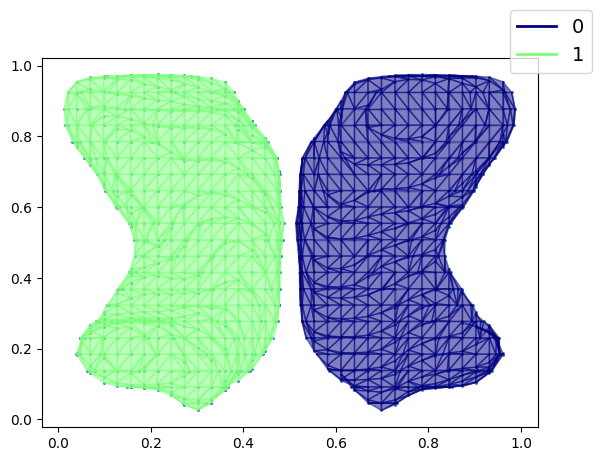

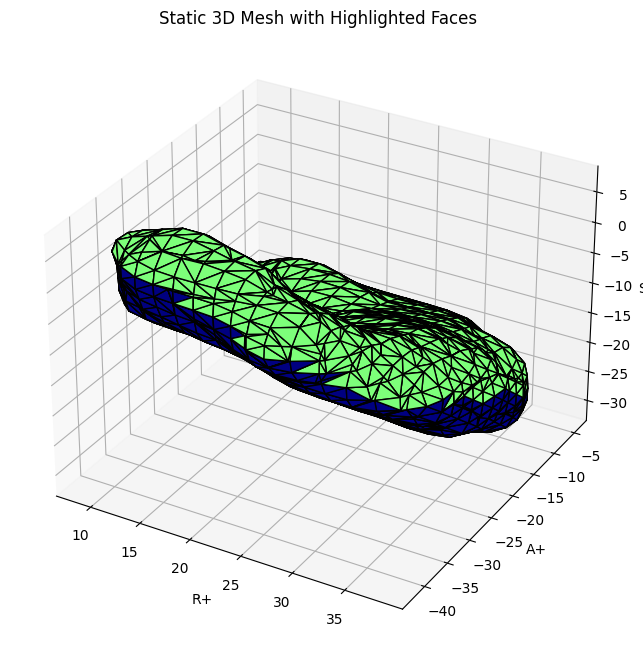

In [6]:
rt_face_components, (_, _) = show_components(rt_hippo_mesh_info, rt_hippo_uv_mesh_info)

# Remain superior only

/tmp/ipykernel_2197902/3542798259.py:1: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



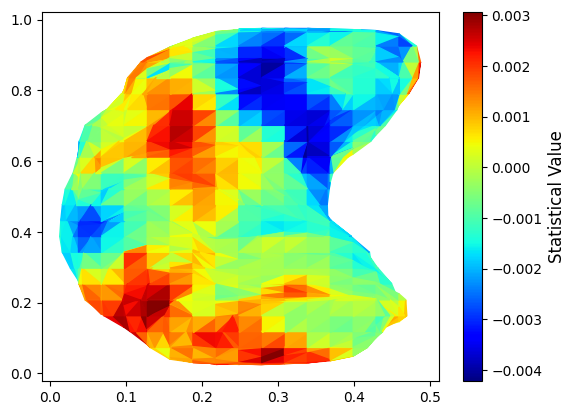

In [7]:
lt_superior_mesh_info = component_mesh_info(lt_hippo_uv_mesh_info, lt_face_components[1])
fig, axis = show_stat_onUV(vertices = lt_superior_mesh_info["vertex"], 
                           uv_coordinates = lt_superior_mesh_info["uv"],
                           faces = lt_superior_mesh_info["face"],
                           stat_path = data_paths[0])

/tmp/ipykernel_2197902/933500499.py:1: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



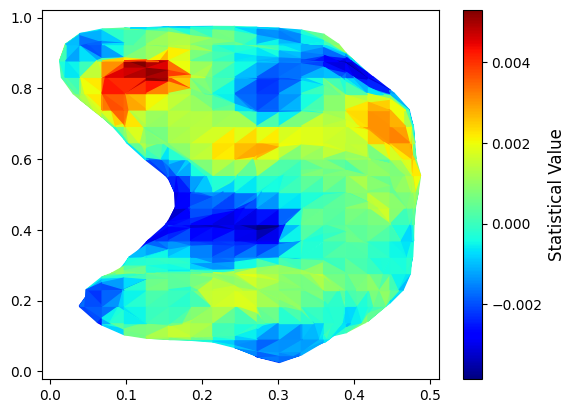

In [8]:
rt_superior_mesh_info = component_mesh_info(rt_hippo_uv_mesh_info, rt_face_components[1])
fig, axis = show_stat_onUV(vertices = rt_superior_mesh_info["vertex"], 
                           uv_coordinates = rt_superior_mesh_info["uv"],
                           faces = rt_superior_mesh_info["face"],
                           stat_path = data_paths[0])

Text(0, 0.5, 'PA')

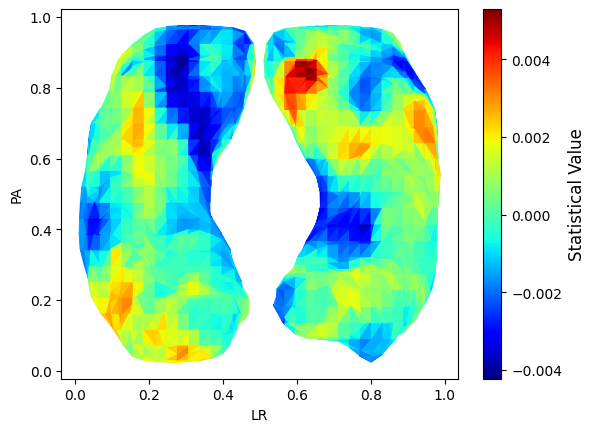

In [9]:
rt_uv = copy(rt_superior_mesh_info["uv"])
rt_uv[:, 0] = rt_uv[:, 0] + 0.5
both_uv = np.r_[lt_superior_mesh_info["uv"], rt_uv]
both_vertices = np.r_[lt_superior_mesh_info["vertex"], rt_superior_mesh_info["vertex"]]
both_face = np.r_[lt_superior_mesh_info["face"], rt_superior_mesh_info["face"] + len(lt_superior_mesh_info["vertex"])]
fig, axis = show_stat_onUV(vertices = both_vertices, 
                           uv_coordinates = both_uv,
                           faces = both_face,
                           stat_path = data_paths[0])
axis.set_xlabel("LR")
axis.set_ylabel("PA")

# Sampling

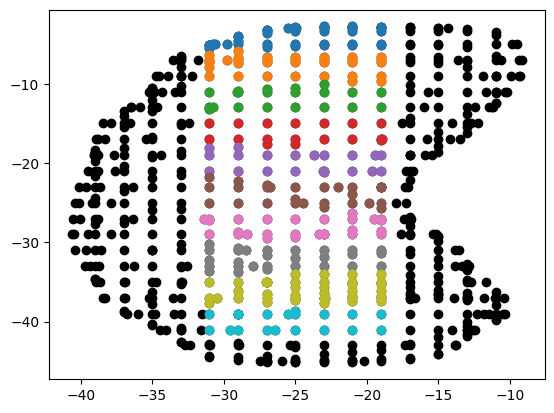

In [10]:
lt_profile_result_info = surface_profile_onUV(data_paths = data_paths, 
                                    vertices = lt_superior_mesh_info["vertex"],
                                    uv_coordinates = lt_superior_mesh_info["uv"], 
                                    from_point = from_point, 
                                    to_point = to_point, 
                                    n_sampling = n_sampling, 
                                    width = width)

# Left total
plt.scatter(lt_superior_mesh_info["vertex"][:, 0], lt_superior_mesh_info["vertex"][:, 1], color = "black")
for coverage in lt_profile_result_info["sampling_coverages"]:
    virticies = lt_superior_mesh_info["vertex"][coverage]
    plt.scatter(virticies[:, 0], virticies[:, 1])

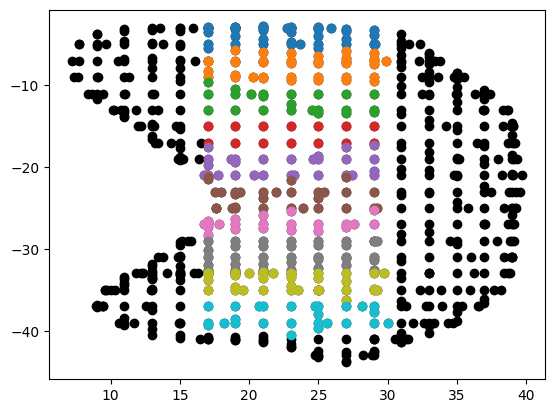

In [11]:
rt_profile_result_info = surface_profile_onUV(data_paths = data_paths, 
                                              vertices = rt_superior_mesh_info["vertex"],
                                              uv_coordinates = rt_superior_mesh_info["uv"], 
                                              from_point = from_point, 
                                              to_point = to_point, 
                                              n_sampling = n_sampling, 
                                              width = width)

# Right total
plt.scatter(rt_superior_mesh_info["vertex"][:, 0], rt_superior_mesh_info["vertex"][:, 1], color = "black")
for coverage in rt_profile_result_info["sampling_coverages"]:
    virticies = rt_superior_mesh_info["vertex"][coverage]
    plt.scatter(virticies[:, 0], virticies[:, 1])

In [12]:
lt_samples = np.expand_dims(lt_profile_result_info["sampling_datas"], axis = 0)
lt_samples = lt_samples.transpose(0, 2, 1)
rt_samples = np.expand_dims(rt_profile_result_info["sampling_datas"], axis = 0)
rt_samples = rt_samples.transpose(0, 2, 1)

both_samples = np.concatenate([lt_samples, rt_samples])


-0.0004 0.0008
-0.0004 0.0008
save: /mnt/ext1/seojin/temp/sampling_hippo.png


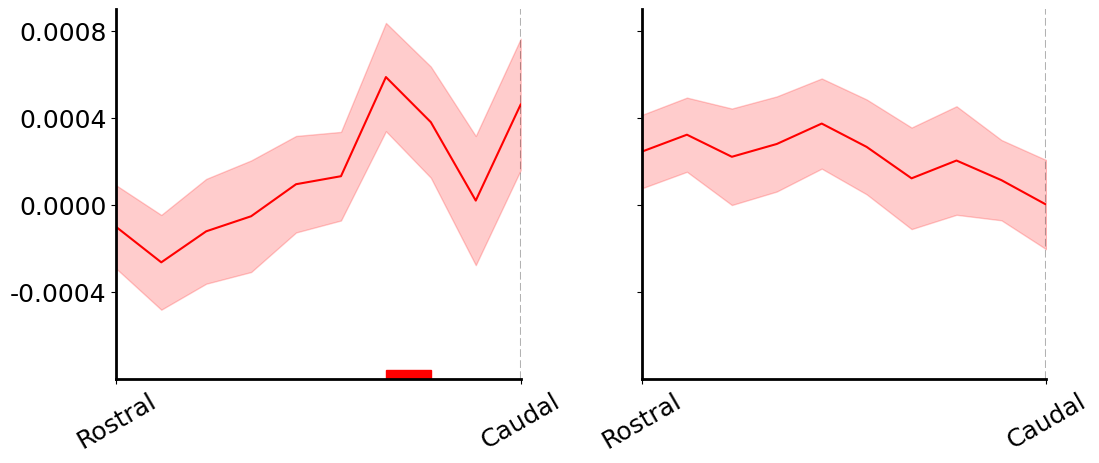

In [13]:
y_range = (-0.0004, 0.0008)

fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(12)
draw_cross_section_1dPlot(ax = axes[0],
                          sampling_datas = lt_samples,
                          sulcus_names = [],
                          roi_names = np.repeat("", n_sampling),
                          xlabel = "",
                          ylabel = "",
                          p_threshold = 0.05,
                          tick_size = 18,
                          y_range = y_range)
axes[0].set_xticks([0, n_sampling - 1])
axes[0].set_xticklabels(["Rostral", "Caudal"], size = 18, rotation = 30)
lines = axes[0].get_lines()
lines[0].set_color("red")
fill = axes[0].collections[0]
fill.set_facecolor("red")
fill.set_edgecolor("red")
rect = axes[0].patches[0]
rect.set_facecolor("red")
rect.set_edgecolor("red")
adjusted_range = axes[0].get_ylim()
axes[0].set_ylim(adjusted_range[0], adjusted_range[1] + 0.0001)

draw_cross_section_1dPlot(ax = axes[1],
                          sampling_datas = rt_samples,
                          sulcus_names = [],
                          roi_names = np.repeat("", n_sampling),
                          xlabel = "",
                          ylabel = "",
                          p_threshold = 0.05,
                          tick_size = 18,
                          y_range = y_range)
axes[1].set_xticks([0, n_sampling - 1])
axes[1].set_xticklabels(["Rostral", "Caudal"], size = 18, rotation = 30)
lines = axes[1].get_lines()
lines[0].set_color("red")
fill = axes[1].collections[0]
fill.set_facecolor("red")
fill.set_edgecolor("red")
fig.subplots_adjust(wspace = 0.3)
axes[1].set_ylim(adjusted_range[0], adjusted_range[1] + 0.0001)

file_path = os.path.join(save_dir_path, "sampling_hippo.png")
fig.savefig(file_path, transparent = True, bbox_inches = "tight", dpi = 96)
print(f"save: {file_path}")

# Virtual strip

In [14]:
highlight_color = np.array([137, 119, 173, 120]) / 255

/tmp/ipykernel_2197902/643326065.py:4: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: xlabel='R+', ylabel='A+', zlabel='S+'>)

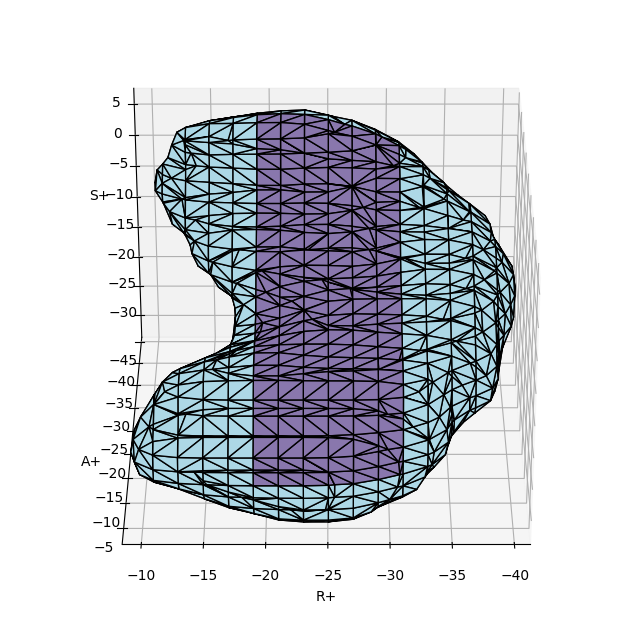

In [15]:
lt_highlight_vertex_indices = inverse_component_mesh_info(lt_superior_mesh_info["mapping_ori2conv"], 
                                                          mask_basedOn_component = lt_profile_result_info["virtual_strip_mask"])

show_mesh(lt_hippo_uv_mesh_info["vertex"], 
          faces = lt_hippo_uv_mesh_info["face"],
          vertex_index_info = {
              "a" : {
                  "color" : highlight_color,
                  "set" : lt_highlight_vertex_indices,
              }
          })

/tmp/ipykernel_2197902/3237966659.py:4: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: xlabel='R+', ylabel='A+', zlabel='S+'>)

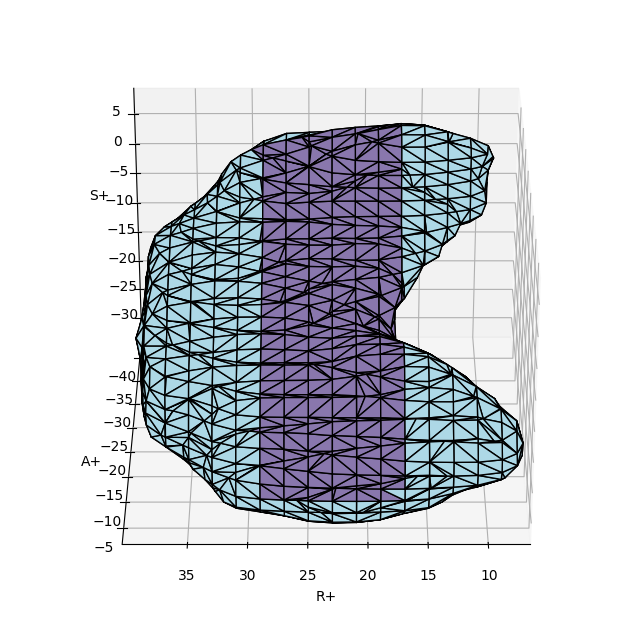

In [16]:
rt_highlight_vertex_indices = inverse_component_mesh_info(rt_superior_mesh_info["mapping_ori2conv"], 
                                                          mask_basedOn_component = rt_profile_result_info["virtual_strip_mask"])

show_mesh(rt_hippo_uv_mesh_info["vertex"], 
          faces = rt_hippo_uv_mesh_info["face"],
          vertex_index_info = {
              "a" : {
                  "color" : highlight_color,
                  "set" : rt_highlight_vertex_indices,
              }
          })

In [17]:
def combine_mesh_info(mesh_info1, 
                      mesh_info2,
                      highlight_vertex_indices1,
                      highlight_vertex_indices2,
                      highlight_face_indices1,
                      highlight_face_indices2):
    vertices = np.r_[mesh_info1["vertex"], mesh_info2["vertex"]]
    faces = np.r_[mesh_info1["face"], mesh_info2["face"] + len(mesh_info1["vertex"])]

    highlight_face = np.r_[highlight_face_indices1, highlight_face_indices2 + len(mesh_info1["face"])]

    expand_vertices = highlight_vertex_indices2 + len(mesh_info1["vertex"])
    highlight_vertex_indices = np.r_[highlight_vertex_indices1, expand_vertices]
    
    mesh_info = {
        "vertex" : vertices,
        "face" : faces,
        "highlight_vertex" : highlight_vertex_indices,
        "highlight_face" : highlight_face
    }
    return mesh_info

In [18]:
lt_is_highlight_face = np.alltrue(np.isin(lt_hippo_uv_mesh_info["face"], lt_highlight_vertex_indices), axis = 1)
lt_highlight_face_indices = np.where(lt_is_highlight_face)[0]

rt_is_highlight_face = np.alltrue(np.isin(rt_hippo_uv_mesh_info["face"], rt_highlight_vertex_indices), axis = 1)
rt_highlight_face_indices = np.where(rt_is_highlight_face)[0]

In [19]:
combined_mesh_info = combine_mesh_info(lt_hippo_uv_mesh_info, 
                                       rt_hippo_uv_mesh_info,
                                       lt_highlight_vertex_indices,
                                       rt_highlight_vertex_indices,
                                       lt_highlight_face_indices, 
                                       rt_highlight_face_indices)

In [20]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

/tmp/ipykernel_2197902/972173854.py:1: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



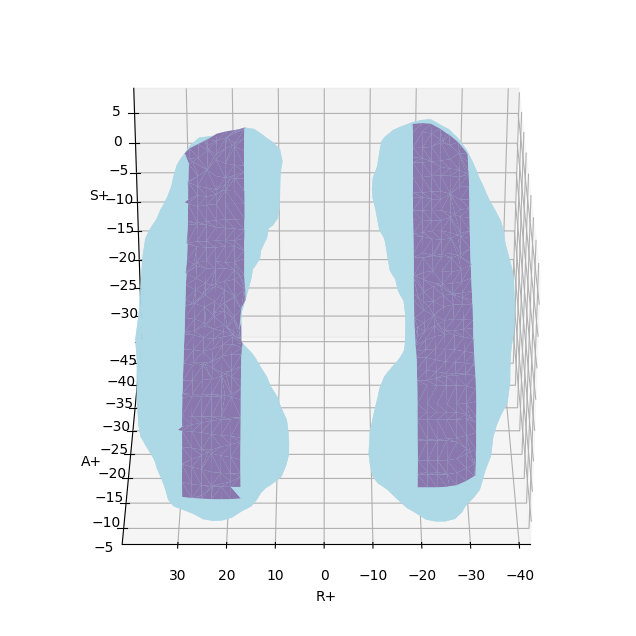

In [21]:
fig, ax = show_mesh(vertices = combined_mesh_info["vertex"],
          faces = combined_mesh_info["face"],
          vertex_index_info = {
              "a" : {
                  "color" : highlight_color,
                  "set" : combined_mesh_info["highlight_vertex"],
              }
          },
          edgeColor = None)

# Interactive virtual strip

In [22]:
lt_is_highlight_face = np.alltrue(np.isin(lt_hippo_uv_mesh_info["face"], lt_highlight_vertex_indices), axis = 1)
lt_highlight_face_indices = np.where(lt_is_highlight_face)[0]
show_interactive_mesh(vertices = lt_hippo_uv_mesh_info["vertex"],
                      faces = lt_hippo_uv_mesh_info["face"],
                      highlight_face_info = {
                          "name" : {
                              "color" : highlight_color,
                              "data" : lt_highlight_face_indices,
                          }
                      })

In [23]:
rt_is_highlight_face = np.alltrue(np.isin(rt_hippo_uv_mesh_info["face"], rt_highlight_vertex_indices), axis = 1)
rt_highlight_face_indices = np.where(rt_is_highlight_face)[0]
show_interactive_mesh(vertices = rt_hippo_uv_mesh_info["vertex"],
                      faces = rt_hippo_uv_mesh_info["face"],
                      highlight_face_info = {
                          "name" : {
                              "color" : highlight_color,
                              "data" : rt_highlight_face_indices,
                          }
                      })

In [24]:
show_interactive_mesh(vertices = np.r_[lt_hippo_uv_mesh_info["vertex"], rt_hippo_uv_mesh_info["vertex"]],
                      faces = np.r_[lt_hippo_uv_mesh_info["face"], rt_hippo_uv_mesh_info["face"] + len(lt_hippo_uv_mesh_info["vertex"])],
                      highlight_face_info = {
                          "name" : {
                              "color" : highlight_color,
                              "data" : np.r_[lt_is_highlight_face_indices, rt_is_highlight_face_indices + len(lt_hippo_uv_mesh_info["face"])],
                          }
                      },
                      default_color = "lightblue",
                      is_visible_axis = True)

NameError: name 'lt_is_highlight_face_indices' is not defined